[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)

In [ ]:
# Libraries for Data Manipulation
import pandas as pd
import numpy as np

from keras.datasets import mnist
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC , LinearSVC

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

from itertools import cycle

In [ ]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('x_train: ' + str(x_train.shape))
print('y_train: ' + str(y_train.shape))
print('x_test:  '  + str(x_test.shape))
print('y_test:  '  + str(y_test.shape))

11490434/11490434 [==============================] - 0s 0us/step
x_train: (60000, 28, 28)
y_train: (60000,)
x_test:  (10000, 28, 28)
y_test:  (10000,)


In [ ]:
# Flatten the images to 2D arrays
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

x_train = x_train/255.0
x_test = x_test/255.0

# Standardize the data
sc = StandardScaler()
x_train_ss = sc.fit_transform(x_train)
x_test_ss = sc.transform(x_test)

In [ ]:
print('x_train: ' + str(x_train_ss.shape))
print('y_train: ' + str(y_train.shape))
print('x_test:  '  + str(x_test_ss.shape))
print('y_test:  '  + str(y_test.shape))

x_train: (60000, 784)
y_train: (60000,)
x_test:  (10000, 784)
y_test:  (10000,)


# Fitting the Model support vector machine - kernel (linear)

In [ ]:
# Fitting the Model (support vector machine)
svm_model= SVC(kernel='linear')

# Train the model
svm_model.fit(x_train_ss, y_train)

# Predict on test set
y_pred_svm = svm_model.predict(x_test_ss)
print('y_pred_svm: ', y_pred_svm)

y_pred_svm:  [7 2 1 ... 4 5 6]


In [ ]:
# Compute confusion matrix for model with support vector machine
conf_mat_svm= metrics.confusion_matrix(y_test, y_pred_svm)
print('support vector machine [kernerl - linear]')
print(f"Confusion matrix:\n{conf_mat_svm}")

# Calculate accuracy score on test set
accuracy_score_svm= accuracy_score(y_test, y_pred_svm)
print('accuracy score: ', accuracy_score_svm)
print('accuracy in percentage: ',int(accuracy_score_svm*100),'%')
print(classification_report(y_test, y_pred_svm))

support vector machine [kernerl - linear]
Confusion matrix:
[[ 951    0    5    2    2    8    8    2    1    1]
 [   0 1119    6    2    0    1    2    1    4    0]
 [  10   13  956   11    7    4    5    6   18    2]
 [   7    1   15  941    0   16    1    6   19    4]
 [   3    2   18    1  929    0    3    5    4   17]
 [   7    6    7   41    6  789   12    2   19    3]
 [  12    3   13    1    8   17  902    0    2    0]
 [   2    8   23   13   10    1    0  945    5   21]
 [  12    6   11   28    8   24    9    6  858   12]
 [   6    7    6   10   36    4    1   23   13  903]]
accuracy score:  0.9293
accuracy in percentage:  92 %
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       980
           1       0.96      0.99      0.97      1135
           2       0.90      0.93      0.91      1032
           3       0.90      0.93      0.91      1010
           4       0.92      0.95      0.93       982
           5       0.91      0

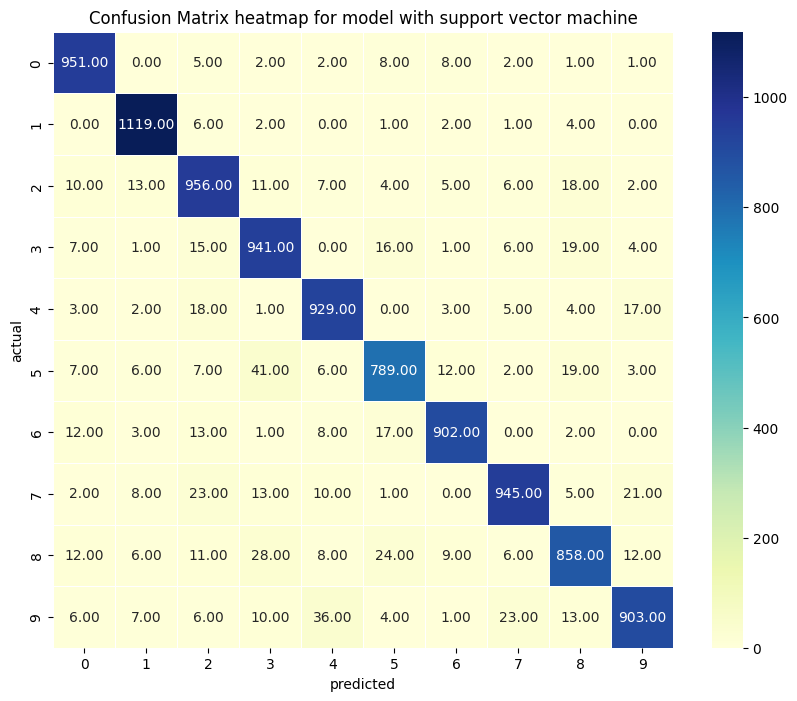

In [ ]:
# Plot confusion matrix for model with support vector machine
conf_mat_svm= pd.crosstab(y_test, y_pred_svm, rownames=['actual'], colnames=['predicted'])
fig , ax = plt.subplots(figsize = (10 , 8))
ax = sns.heatmap(conf_mat_svm , annot=True , linewidths=0.5 , fmt="0.2f" , cmap="YlGnBu")
plt.title('Confusion Matrix heatmap for model with support vector machine')
plt.show()

In [ ]:
# Plot ROC curve for each class
test_y_bin = label_binarize(y_test, classes=np.arange(10))
y_score = svm_model.decision_function(x_test_ss)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(test_y_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

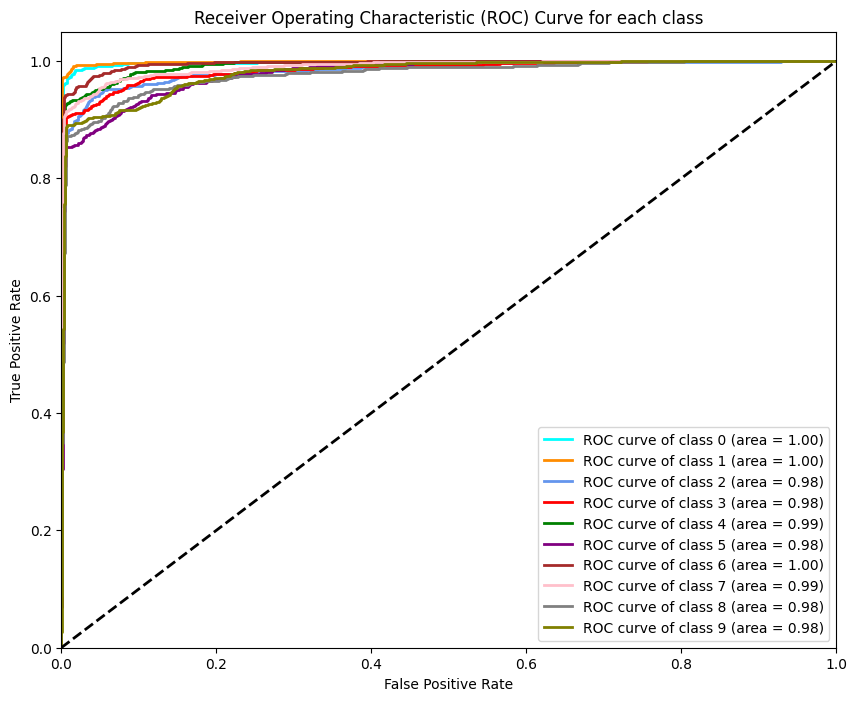

In [ ]:
# Plot all ROC curves
plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green', 'purple', 'brown', 'pink', 'gray', 'olive'])
for i, color in zip(range(10), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for each class')
plt.legend(loc="lower right")
plt.show()

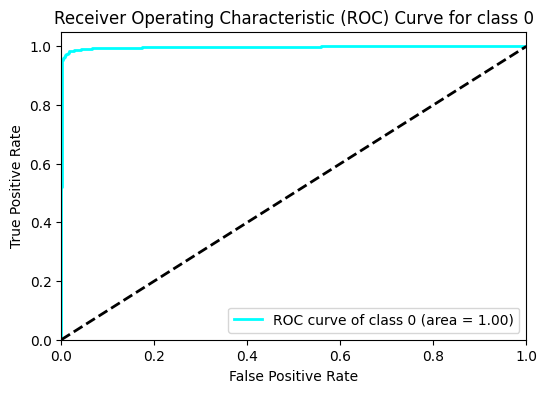

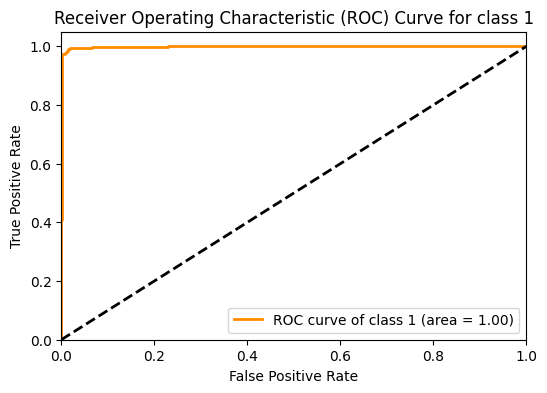

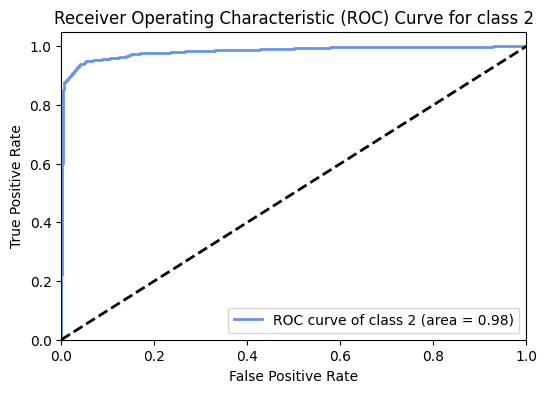

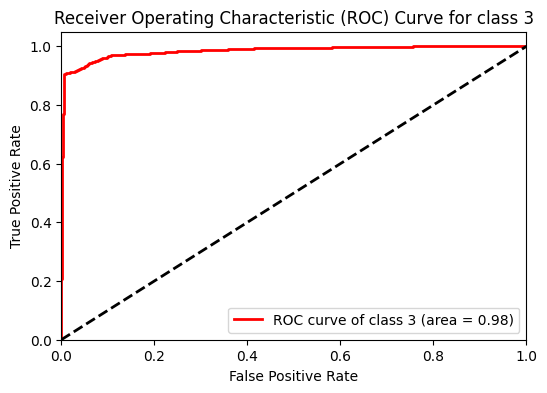

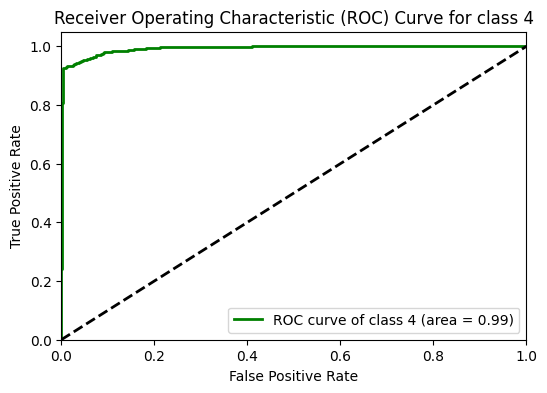

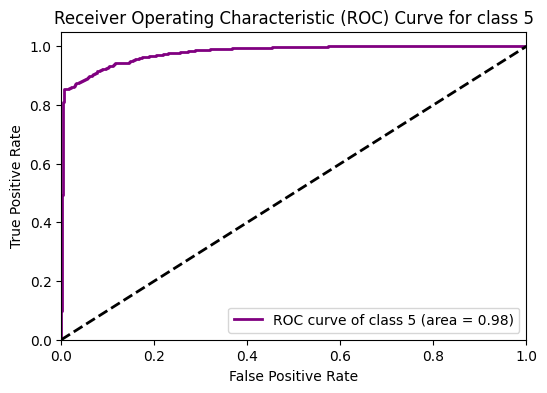

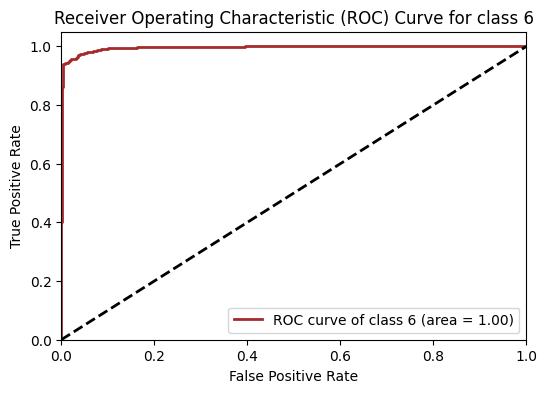

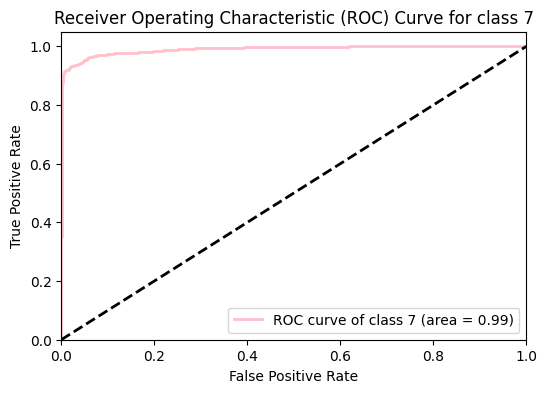

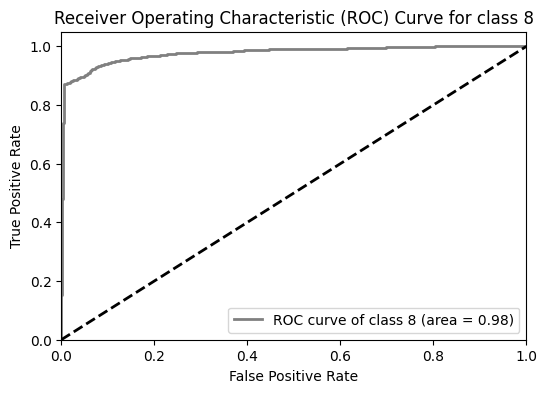

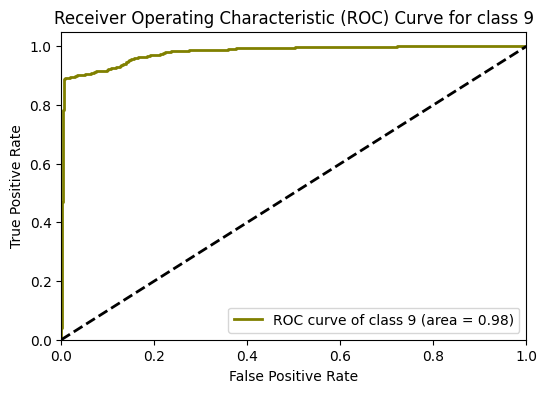

In [ ]:
# Plot separate ROC curves for each class
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green', 'purple', 'brown', 'pink', 'gray', 'olive'])
for i, color in zip(range(10), colors):
    plt.figure(figsize=(6, 4))
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve for class {0}'.format(i))
    plt.legend(loc="lower right")
    plt.show()

confusion matrix to include precision and recall

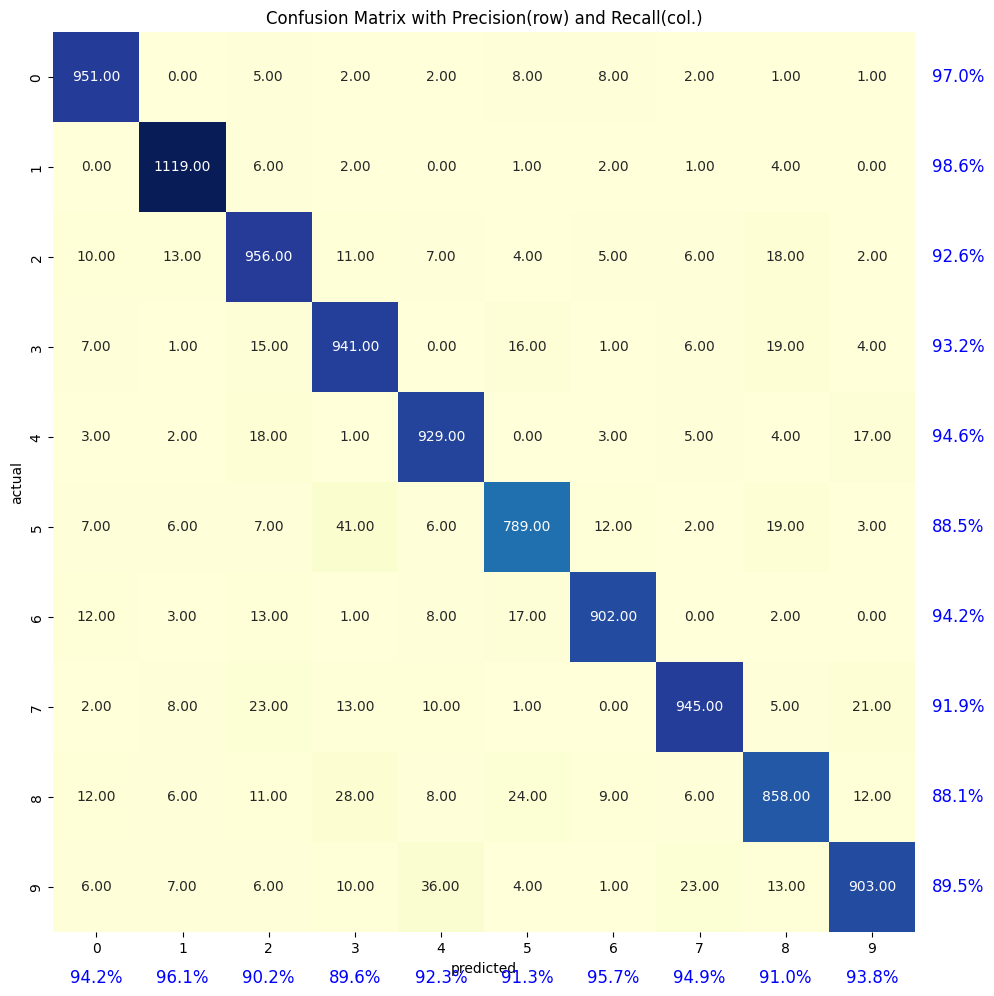

In [ ]:
# Data for the confusion matrix
df = np.array(conf_mat_svm)

# Class labels
labels = [i for i in range(10)]

# Calculate precision and recall
precision = np.diag(df) / np.sum(df, axis=0)
recall = np.diag(df) / np.sum(df, axis=1)

# Extend the confusion matrix to include precision and recall
df_with_prec_rec = np.zeros((11, 11), dtype=object)

# Fill in the confusion matrix
for i in range(10):
    for j in range(10):
        df_with_prec_rec[i, j] = df[i, j]

# Fill in the precision row
for i in range(10):
    df_with_prec_rec[10, i] = f'{precision[i]*100:.1f}%'

# Fill in the recall column
for i in range(10):
    df_with_prec_rec[i, 10] = f'{recall[i]*100:.1f}%'

# Fill in the label for the bottom right corner
df_with_prec_rec[10, 10] = ''

# Create a confusion matrix plot
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df, annot=True, fmt="0.2f" , cmap="YlGnBu", xticklabels=labels, yticklabels=labels, ax=ax, cbar=False)

# Add precision and recall values
for i in range(10):
    ax.text(i + 0.5, 10.5, f'{precision[i]*100:.1f}%', ha='center', va='center', fontsize=12, color='blue')
    ax.text(10.5, i + 0.5, f'{recall[i]*100:.1f}%', ha='center', va='center', fontsize=12, color='blue')

# Labels and title
ax.set_xlabel('predicted')
ax.set_ylabel('actual')
ax.set_title('Confusion Matrix with Precision(row) and Recall(col.)')

# Adjust layout to fit the precision and recall annotations
plt.tight_layout()
plt.show()

**point** | The linear SVC model has 92% accuracy and class one has the highest precision and recall.

# Fitting the Model support vector machine - kernel (rbf)

In [ ]:
# Fitting the Model (support vector machine)
svm1_model= SVC(kernel='rbf')

# Train the model
svm1_model.fit(x_train_ss, y_train)

# Predict on test set
y_pred_svm1 = svm1_model.predict(x_test_ss)
print('y_pred_svm1: ', y_pred_svm1)

y_pred_svm1:  [7 2 1 ... 4 5 6]


In [ ]:
# Compute confusion matrix for model with support vector machine
conf_mat_svm1= metrics.confusion_matrix(y_test, y_pred_svm1)
print('support vector machine [kernerl - rbf]')
print(f"Confusion matrix:\n{conf_mat_svm1}")

# Calculate accuracy score on test set
accuracy_score_svm1= accuracy_score(y_test, y_pred_svm1)
print('accuracy score: ', accuracy_score_svm1)
print('accuracy in percentage: ',int(accuracy_score_svm1*100),'%')
print(classification_report(y_test, y_pred_svm1))

support vector machine [kernerl - rbf]
Confusion matrix:
[[ 968    0    1    1    0    3    3    2    2    0]
 [   0 1127    3    0    0    1    2    0    2    0]
 [   5    1  996    2    2    0    1   15    9    1]
 [   0    0    4  980    1    7    0   11    7    0]
 [   0    0   12    0  944    2    4    7    3   10]
 [   2    0    1   10    2  854    6    8    7    2]
 [   6    2    1    0    4    8  930    2    5    0]
 [   1    6   13    2    3    0    0  990    0   13]
 [   3    0    4    6    6    9    3   14  926    3]
 [   4    6    5   11   12    2    0   20    3  946]]
accuracy score:  0.9661
accuracy in percentage:  96 %
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.96      1032
           3       0.97      0.97      0.97      1010
           4       0.97      0.96      0.97       982
           5       0.96      0.96

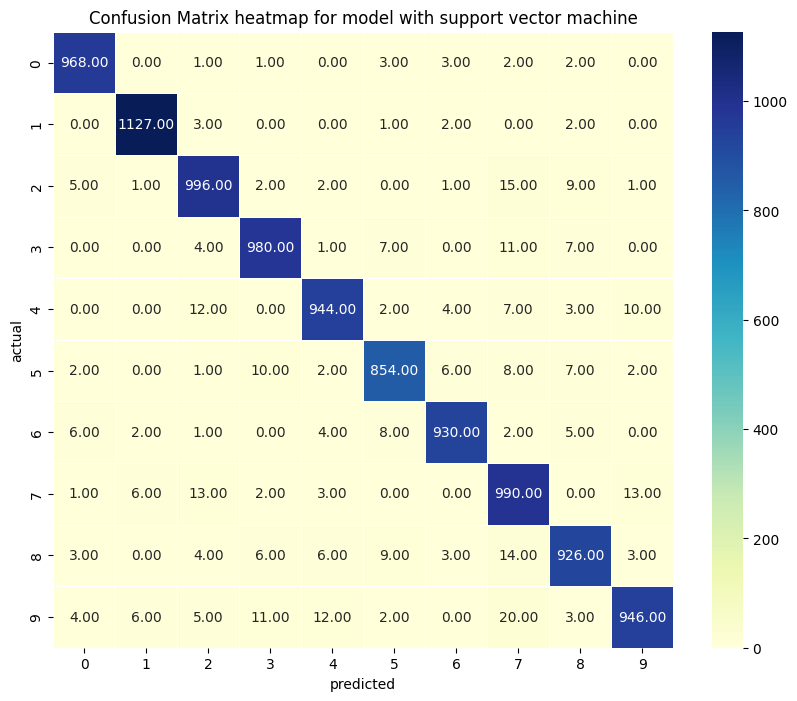

In [ ]:
# Plot confusion matrix for model with support vector machine
conf_mat_svm1= pd.crosstab(y_test, y_pred_svm1, rownames=['actual'], colnames=['predicted'])
fig , ax = plt.subplots(figsize = (10 , 8))
ax = sns.heatmap(conf_mat_svm1 , annot=True , linewidths=0.5 , fmt="0.2f" , cmap="YlGnBu")
plt.title('Confusion Matrix heatmap for model with support vector machine')
plt.show()

In [ ]:
# Plot ROC curve for each class
test_y_bin = label_binarize(y_test, classes=np.arange(10))
y_score1 = svm1_model.decision_function(x_test_ss)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(test_y_bin[:, i], y_score1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

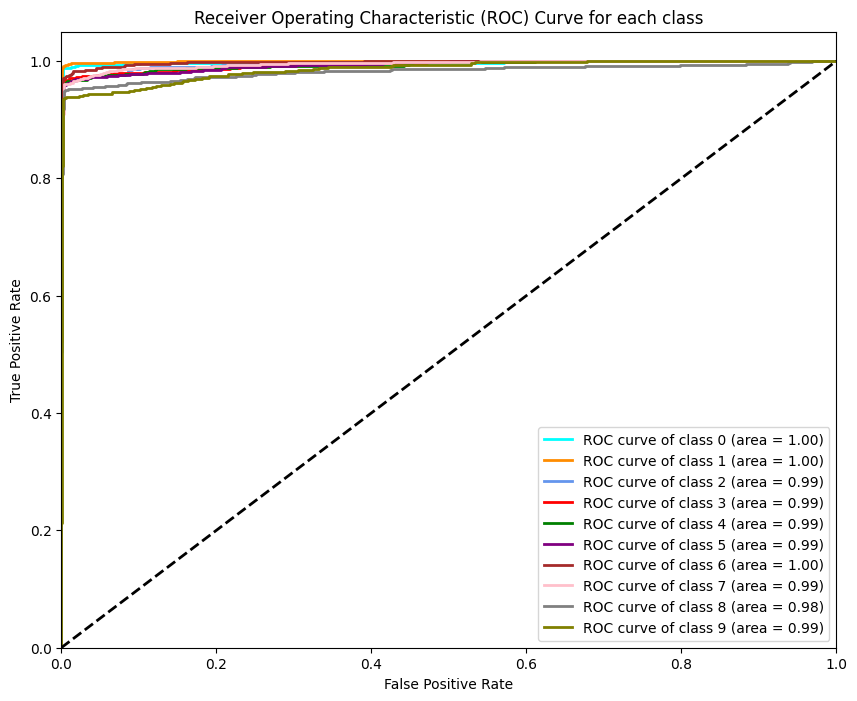

In [ ]:
# Plot all ROC curves
plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green', 'purple', 'brown', 'pink', 'gray', 'olive'])
for i, color in zip(range(10), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for each class')
plt.legend(loc="lower right")
plt.show()

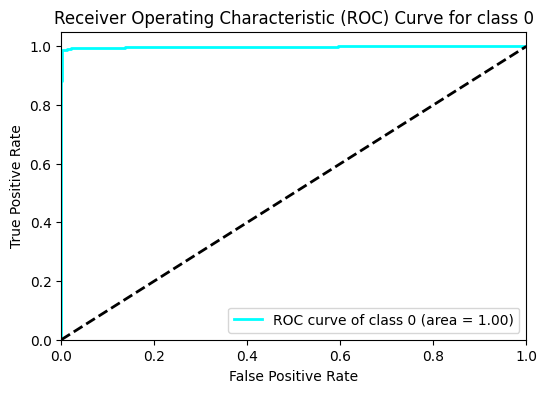

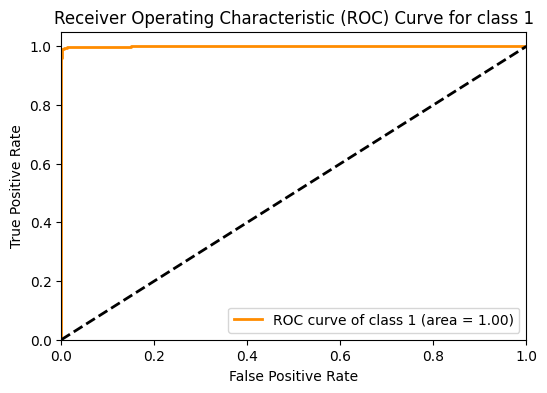

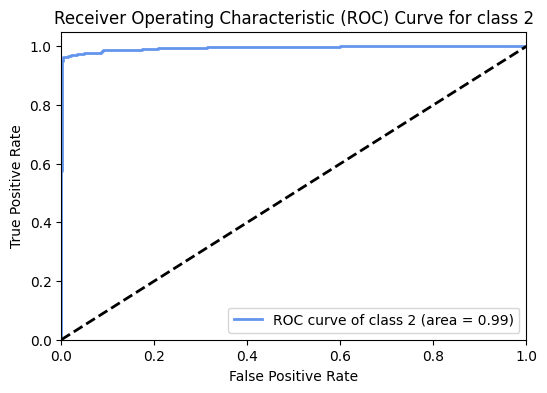

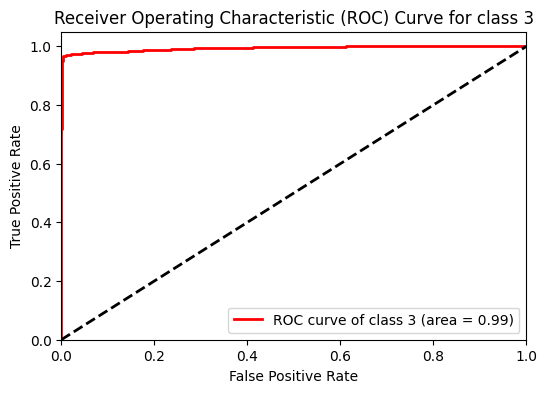

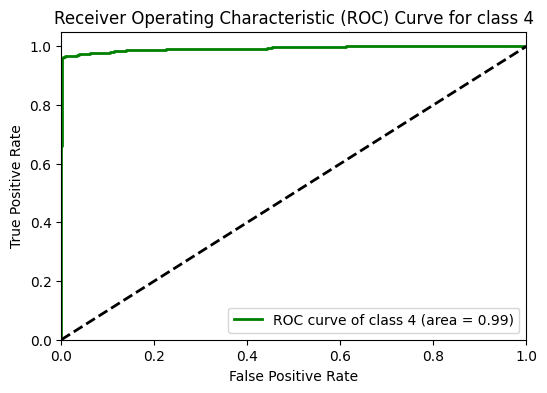

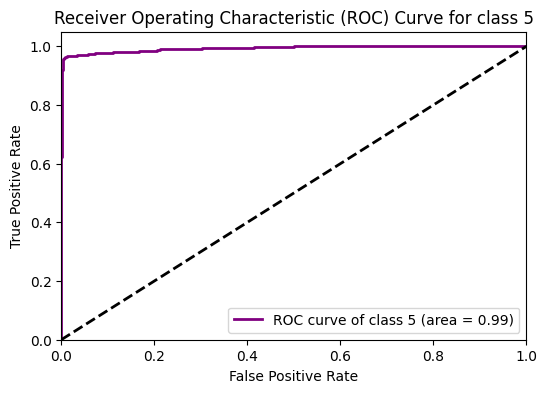

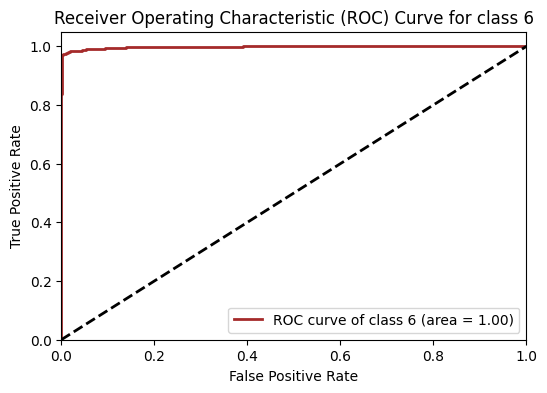

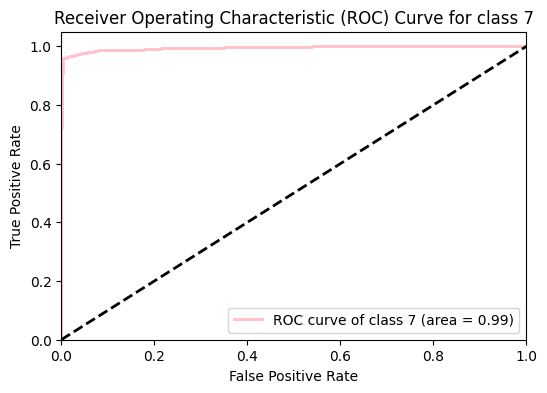

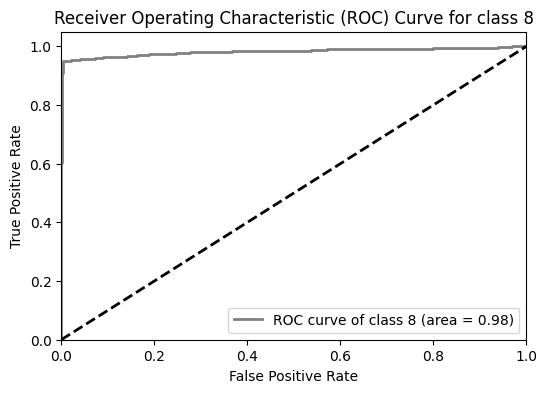

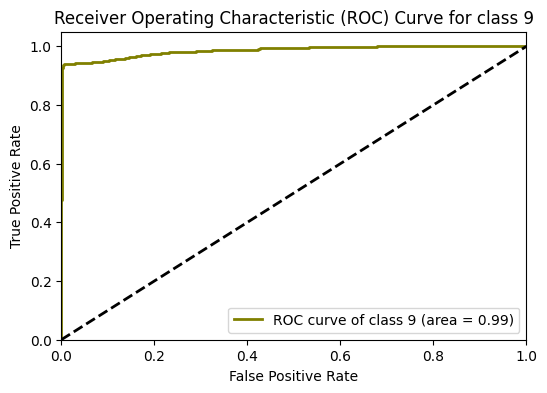

In [ ]:
# Plot separate ROC curves for each class
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green', 'purple', 'brown', 'pink', 'gray', 'olive'])
for i, color in zip(range(10), colors):
    plt.figure(figsize=(6, 4))
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve for class {0}'.format(i))
    plt.legend(loc="lower right")
    plt.show()

confusion matrix to include precision and recall

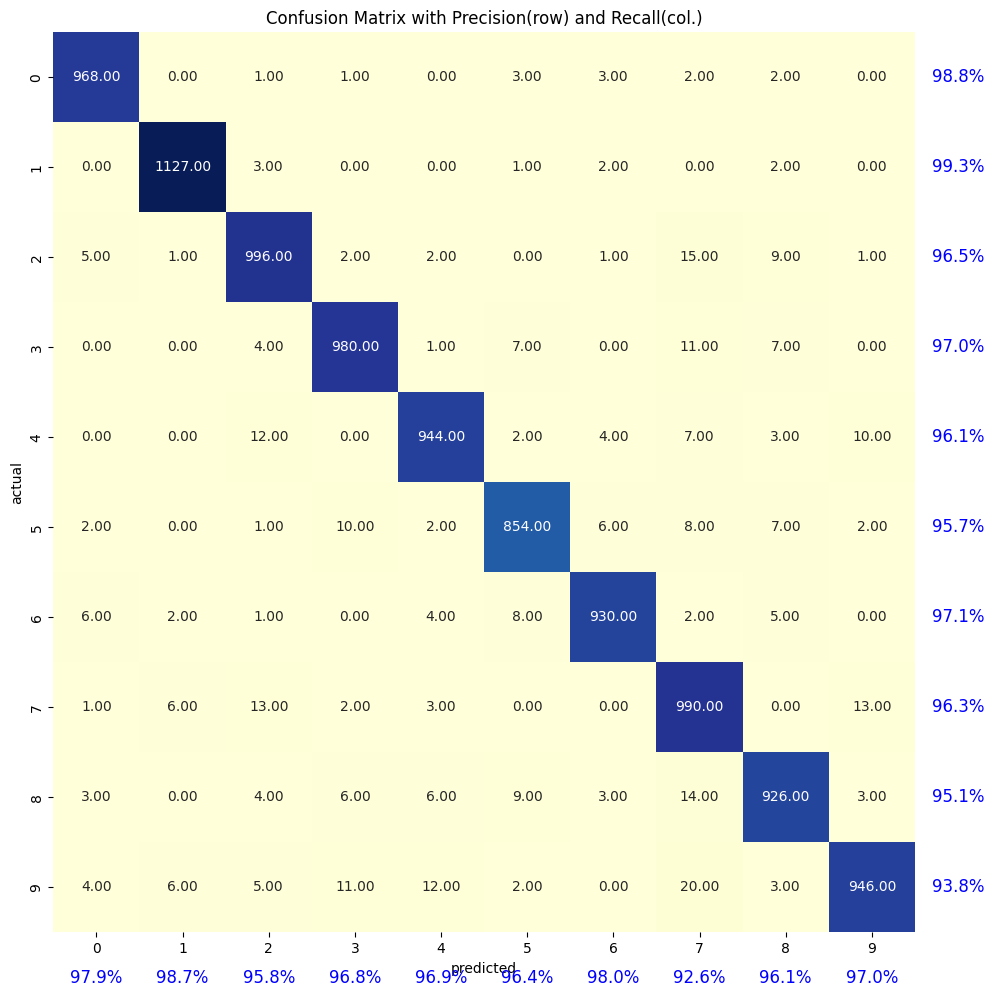

In [ ]:
# Data for the confusion matrix
df1 = np.array(conf_mat_svm1)

# Class labels
labels = [i for i in range(10)]

# Calculate precision and recall
precision = np.diag(df1) / np.sum(df1, axis=0)
recall = np.diag(df1) / np.sum(df1, axis=1)

# Extend the confusion matrix to include precision and recall
df1_with_prec_rec = np.zeros((11, 11), dtype=object)

# Fill in the confusion matrix
for i in range(10):
    for j in range(10):
        df1_with_prec_rec[i, j] = df1[i, j]

# Fill in the precision row
for i in range(10):
    df1_with_prec_rec[10, i] = f'{precision[i]*100:.1f}%'

# Fill in the recall column
for i in range(10):
    df1_with_prec_rec[i, 10] = f'{recall[i]*100:.1f}%'

# Fill in the label for the bottom right corner
df1_with_prec_rec[10, 10] = ''

# Create a confusion matrix plot
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df1, annot=True, fmt="0.2f" , cmap="YlGnBu", xticklabels=labels, yticklabels=labels, ax=ax, cbar=False)

# Add precision and recall values
for i in range(10):
    ax.text(i + 0.5, 10.5, f'{precision[i]*100:.1f}%', ha='center', va='center', fontsize=12, color='blue')
    ax.text(10.5, i + 0.5, f'{recall[i]*100:.1f}%', ha='center', va='center', fontsize=12, color='blue')

# Labels and title
ax.set_xlabel('predicted')
ax.set_ylabel('actual')
ax.set_title('Confusion Matrix with Precision(row) and Recall(col.)')

# Adjust layout to fit the precision and recall annotations
plt.tight_layout()
plt.show()

**point** | The Radial Basis Function(rbf) SVC model has 96% accuracy and class one has the highest precision and recall.